<a href="https://colab.research.google.com/github/Nazif-25/DSA/blob/main/CSE221_Lab_5_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem A

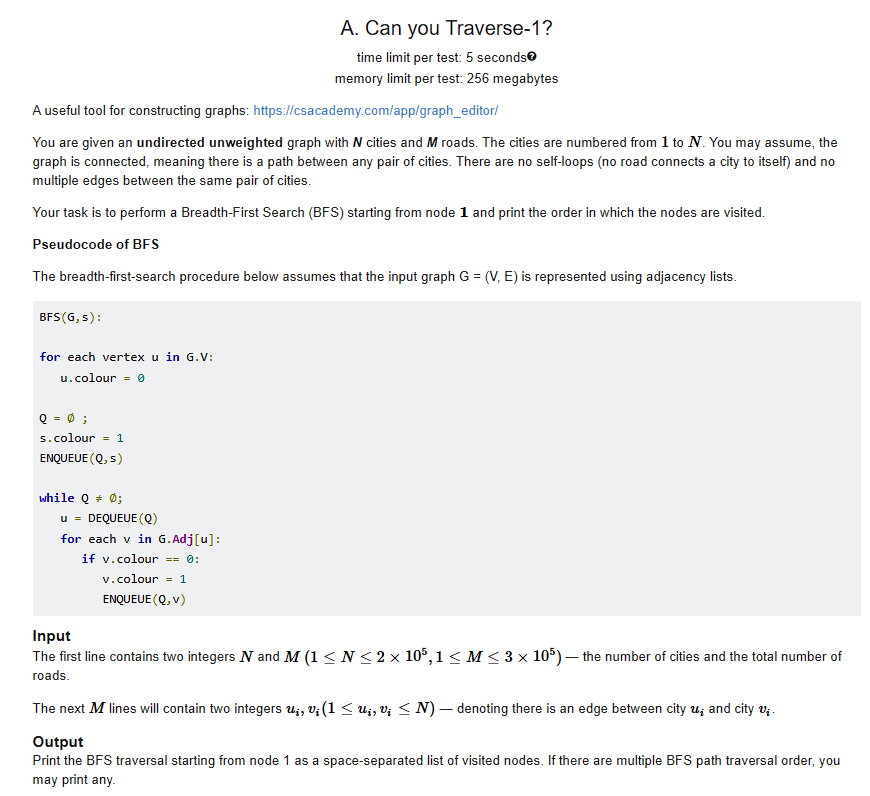

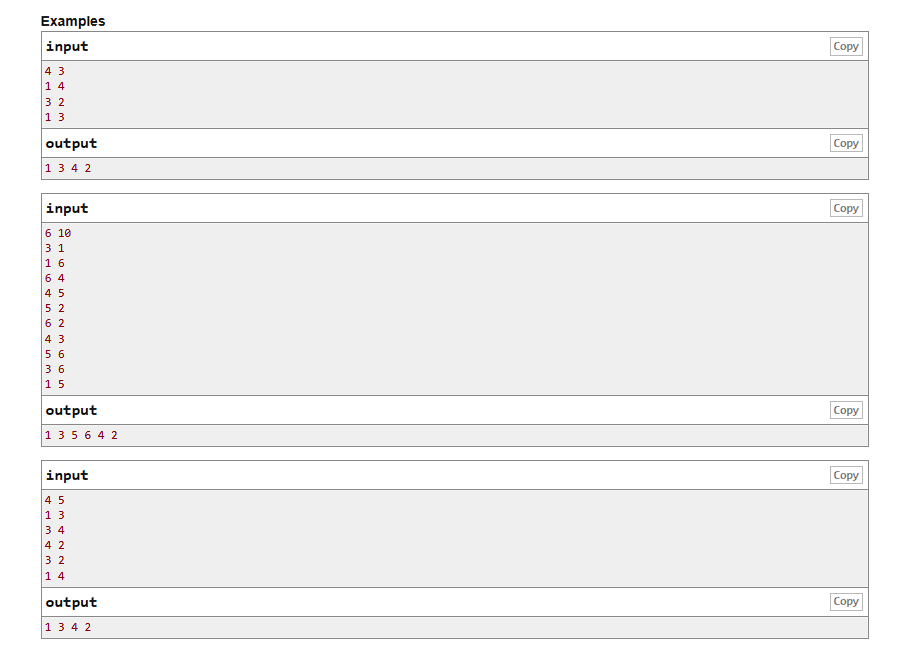

In [ ]:
class Node:
    def __init__(self, elem):
        self.elem = elem
        self.next = None


class Queue:
    def __init__(self):
        self.front = self.rear = None

    def enqueue(self, elem):
        new_node = Node(elem)
        if self.rear is None:
            self.front = self.rear = new_node
            return
        self.rear.next = new_node
        self.rear = new_node

    def dequeue(self):
        if self.is_empty():
            raise IndexError("Queue is empty")
        removed_elem = self.front.elem
        self.front = self.front.next
        if self.front is None:
            self.rear = None
        return removed_elem

    def peek(self):
        if self.is_empty():
            raise IndexError("Queue is empty")
        return self.front.elem

    def is_empty(self):
        return self.front is None


cities, roads = map(int, input().split())
adj_list = {node: [] for node in range(1,cities+1)}
for _ in range(roads):
    source, destination = map(int, input().split())
    adj_list[source].append(destination)
    adj_list[destination].append(source)


def BFS(graph, start):
    queue = Queue()
    visited = [0]*(len(graph)+1)
    queue.enqueue(start)
    visited[start] = 1
    while queue.is_empty() == False:
        u = queue.dequeue()
        print(str(u), end=" ")
        for v in graph[u]:
            if visited[v] == 0:
                visited[v] = 1
                queue.enqueue(v)


BFS(adj_list, 1)


#Problem B

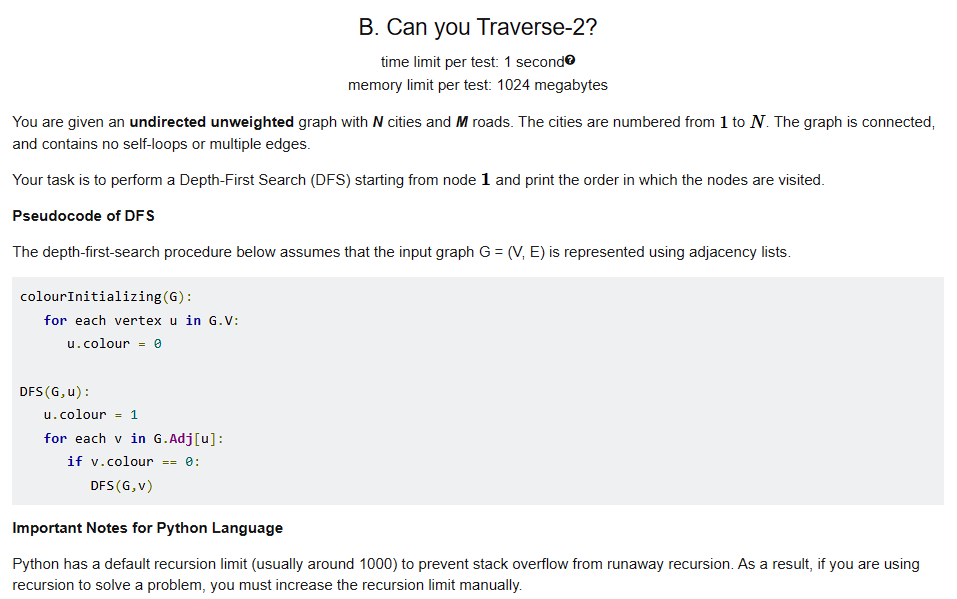

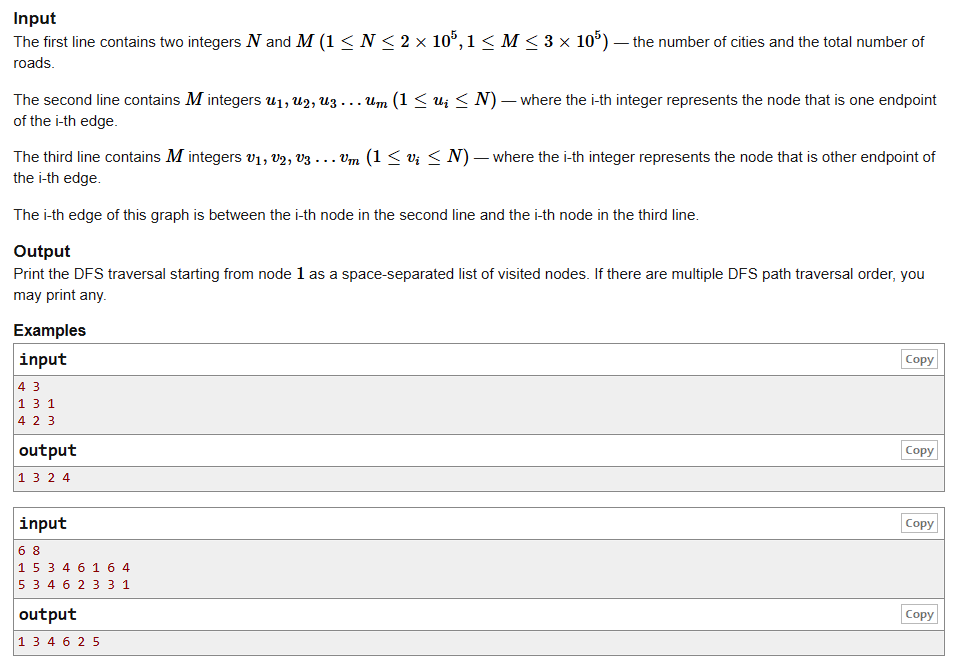

In [ ]:
import sys
sys.setrecursionlimit(2*100000+5)
nodes, edges = map(int, sys.stdin.readline().split())
u = list(map(int, sys.stdin.readline().split()))
v = list(map(int, sys.stdin.readline().split()))

adj_list = {node: [] for node in range(1, nodes+1)}
for i in range(edges):
    adj_list[u[i]].append(v[i])
    adj_list[v[i]].append(u[i])

visited = [0]*(nodes+1)
result = []


def dfs(adj_list, node):
    visited[node] = 1
    result.append(str(node))
    for neighbour in adj_list[node]:
        if visited[neighbour] == 0:
            dfs(adj_list, neighbour)


for node in range(1, nodes+1):
    if visited[node] == 0:
        dfs(adj_list, node)
print(" ".join(result))



#Problem C

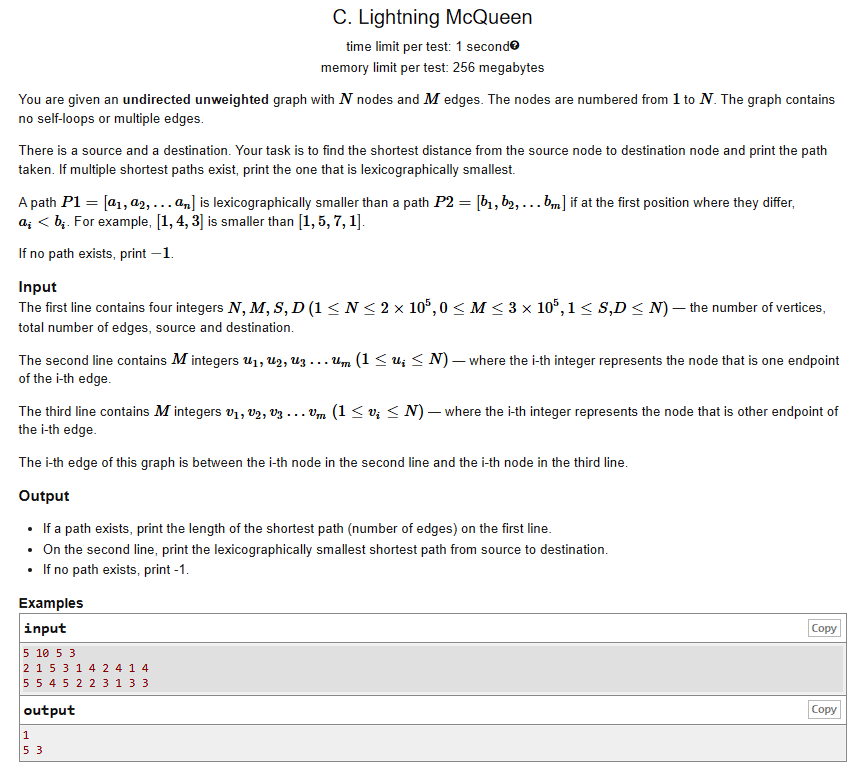

In [ ]:
from collections import deque

nodes, edges, source, dest = list(map(int, input().split()))
u = list(map(int, input().split()))
v = list(map(int, input().split()))
adj_list = [[] for j in range(nodes + 1)]

for i in range(edges):
    adj_list[u[i]].append(v[i])
    adj_list[v[i]].append(u[i])
for k in range(nodes + 1):
    adj_list[k].sort()

visited = [False] * (nodes + 1)
parent = [-1] * (nodes + 1)
distance = [-1] * (nodes + 1)

queue = deque([source])
visited[source] = True
distance[source] = 0

while queue:
    node = queue.popleft()
    for neighbour in adj_list[node]:
        if not visited[neighbour]:
            visited[neighbour] = True
            parent[neighbour] = node
            distance[neighbour] = distance[node] + 1
            queue.append(neighbour)

if distance[dest] == -1:
    print("-1")
else:
    print(distance[dest])

    path = []
    node = dest
    while node != -1:
        path.append(node)
        node = parent[node]

    print(*path[::-1])

#Problem D

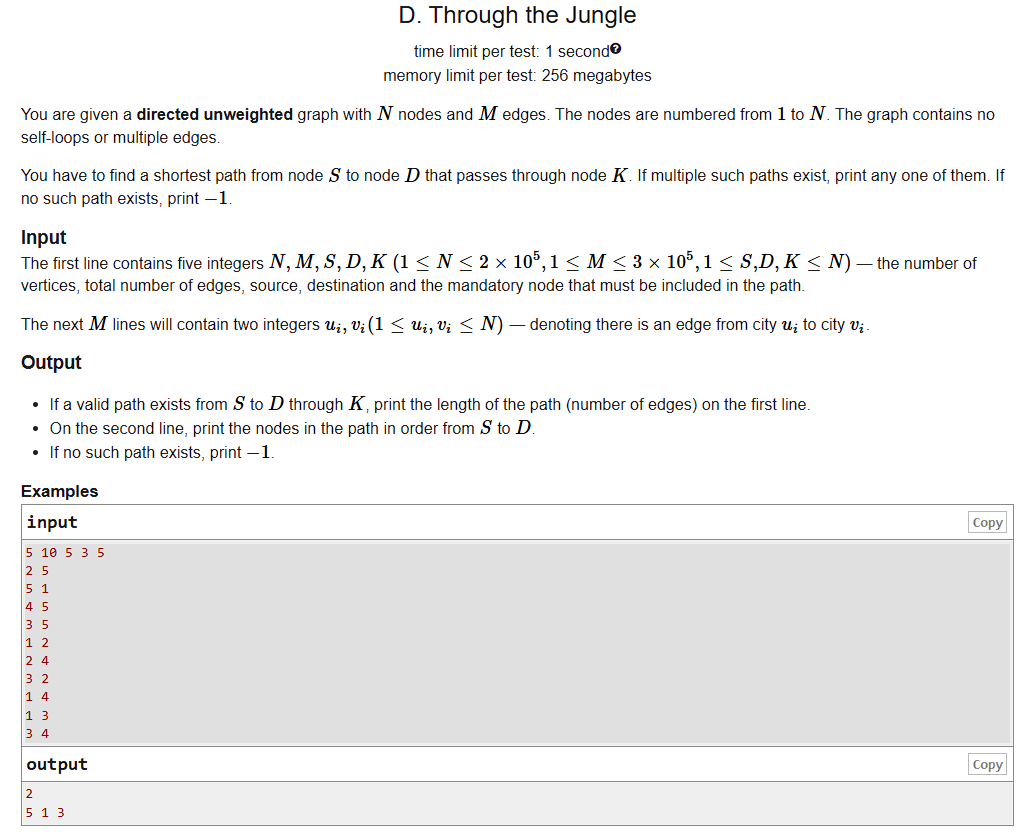

In [ ]:
from collections import deque


def bfs(start, graph, N):
    queue = deque()
    dist = [-1] * (N + 1)
    parent = [-1] * (N + 1)
    queue.append(start)
    dist[start] = 0

    while queue:
        node = queue.popleft()
        for neighbour in graph[node]:
            if dist[neighbour] == -1:
                dist[neighbour] = dist[node] + 1
                parent[neighbour] = node
                queue.append(neighbour)

    return dist, parent


def rcpath(p, end):
    path = []
    while end != -1:
        path.append(end)
        end = p[end]
    return path[::-1]


N, M, S, D, K = list(map(int, input().split()))
adj_list = [[] for j in range(N + 1)]

for k in range(M):
    u, v = list(map(int, input().split()))
    adj_list[u].append(v)

first_path, p_s = bfs(S, adj_list, N)
second_path, p_k = bfs(K, adj_list, N)
third_dist, p_k_to_d = bfs(K, adj_list, N)

if first_path[K] == -1 or third_dist[D] == -1:
    print("-1")

else:
    s_to_k = rcpath(p_s, K)
    k_to_d = rcpath(p_k_to_d, D)
    full = s_to_k + k_to_d[1:]

    print(len(full) - 1)
    print(*full)

#Problem E

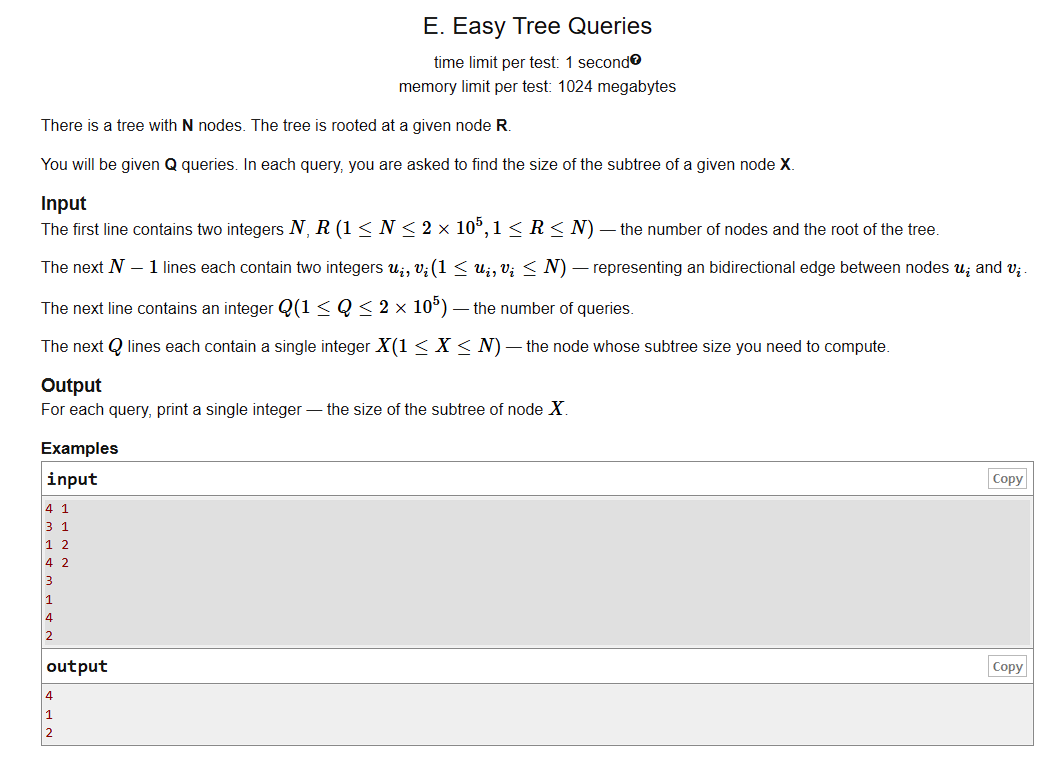

In [ ]:
import sys
sys.setrecursionlimit(200005)
nodes, root = map(int, sys.stdin.readline().split())
adj_list = [[] for _ in range(nodes + 1)]
for _ in range(nodes - 1):
    u, v = map(int, sys.stdin.readline().split())
    adj_list[u].append(v)
    adj_list[v].append(u)

subtree_size = [0] * (nodes + 1)


def dfs(u, parent):
    subtree_size[u] = 1
    for v in adj_list[u]:
        if v != parent:
            dfs(v, u)
            subtree_size[u] += subtree_size[v]


dfs(root, -1)
queries = int(input())
for _ in range(queries):
    x = int(input())
    print(subtree_size[x])


#Problem F

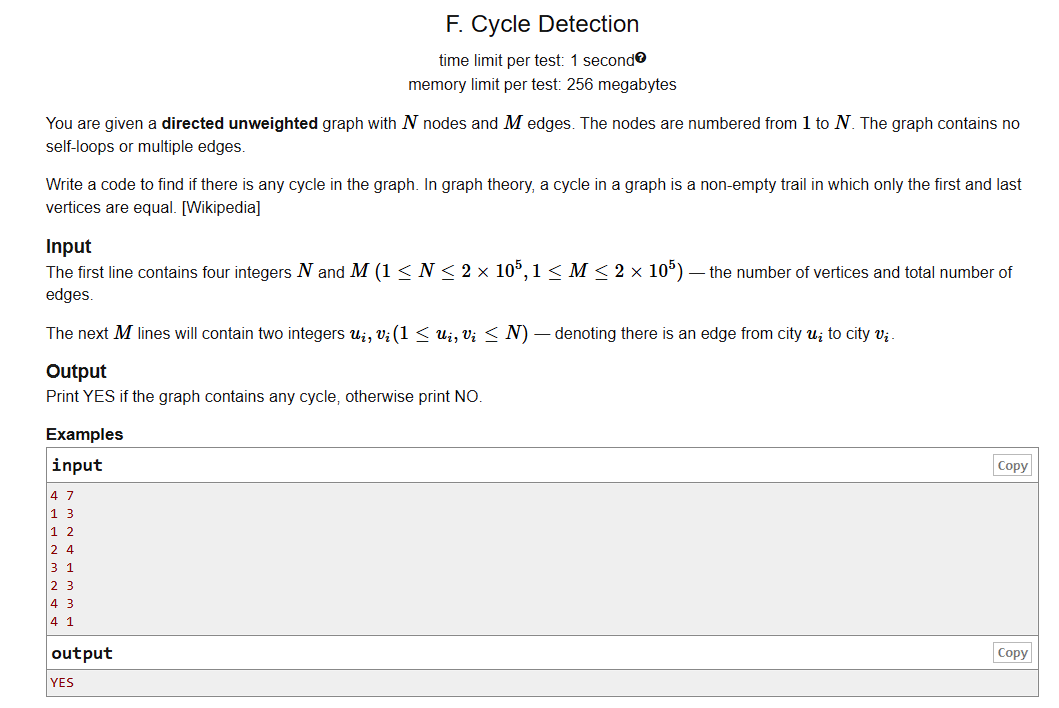

In [ ]:
import sys
sys.setrecursionlimit(2*100000+5)
nodes, edges = map(int, sys.stdin.readline().split())
adj_list = {node: [] for node in range(1, nodes+1)}
for _ in range(edges):
    u, v = map(int, sys.stdin.readline().split())
    adj_list[u].append(v)


def is_graph_cyclic(adj_list):
    visited = [0]*(nodes+1)
    path_visited = [0]*(nodes+1)
    for i in range(1, len(visited)):
        if visited[i] == 0:
            if dfs(adj_list, path_visited, visited, i) == True:
                return True
    return False


def dfs(adj_list, path_visited, visited, i):
    visited[i] = 1
    path_visited[i] = 1
    for neighbor in adj_list[i]:
        if visited[neighbor] == 0:
            if dfs(adj_list, path_visited, visited, neighbor) == True:
                return True
        elif path_visited[neighbor]:
            return True

    path_visited[i] = 0
    return False


if is_graph_cyclic(adj_list) == True:
    print("YES")
else:
    print("NO")



#Problem G

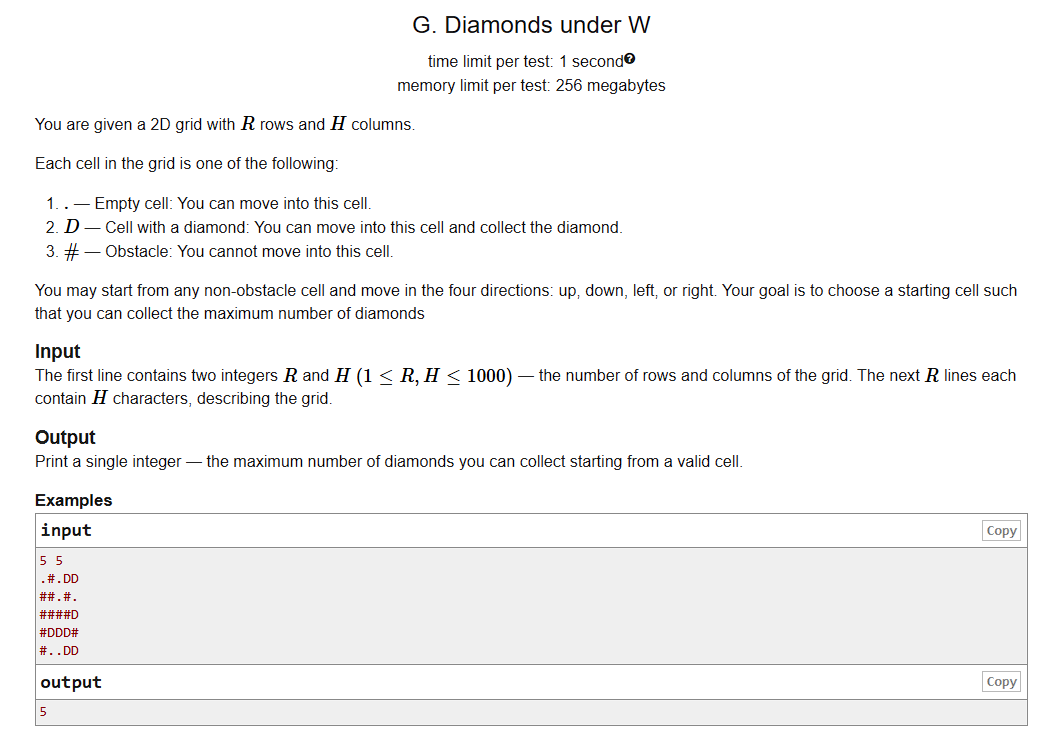

In [ ]:
import sys
from collections import deque
row, col = map(int, sys.stdin.readline().split())
grid = []
for _ in range(row):
    data = sys.stdin.readline().strip()
    grid.append(data)

visited_matrix = [[False] * col for _ in range(row)]
max_diamonds = 0

directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

for r in range(row):
    for c in range(col):
        if grid[r][c] != '#' and visited_matrix[r][c] == False:
            queue = deque()
            queue.append((r, c))
            visited_matrix[r][c] = True
            current_diamonds = 0

            while queue:
                x, y = queue.popleft()
                if grid[x][y] == 'D':
                    current_diamonds += 1

                for old_x, old_y in directions:
                    new_x, new_y = x + old_x, y + old_y
                    if 0 <= new_x < row and 0 <= new_y < col:
                        if grid[new_x][new_y] != '#' and visited_matrix[new_x][new_y] == False:
                            visited_matrix[new_x][new_y] = True
                            queue.append((new_x, new_y))

            if current_diamonds > max_diamonds:
                max_diamonds = current_diamonds

print(max_diamonds)

